# Model Analysis

This notebook is a toy example of analysis you can perform on a single checkpoint model

In [1]:
# Downloading data
from dlip.data.usps import download_usps

path = "../data/raw/"
download_usps(path)

In [4]:
# Loading checkpoint

from dlip.models.models import LinearModel, load_model
from omegaconf import OmegaConf

from dlip.utils.utils import instanciate_class

path_checkpoint = "/home/clement/Documents/MVA/S2/deep_in_practice/DLIP_template/experiment_results/outputs/2024-01-30/17-17-41/checkpoint.pt"
path_conf = "/home/clement/Documents/MVA/S2/deep_in_practice/DLIP_template/experiment_results/outputs/2024-01-30/17-17-41/.hydra/config.yaml"

cfg = OmegaConf.load(path_conf)

model = instanciate_class(cfg.model.name, cfg.model.args)

In [8]:
# Calculate the accuracy to evaluate the model

from dlip.data.data import load_dataset
from dlip.models.evaluation import accuracy

train_set, val_set = load_dataset("../data/raw/")

accuracy(dataset=train_set, model=model, verbose=True)
accuracy(dataset=val_set, model=model, verbose=True);

Accuracy of the model : 16.92 %
Accuracy of the model : 15.72 %


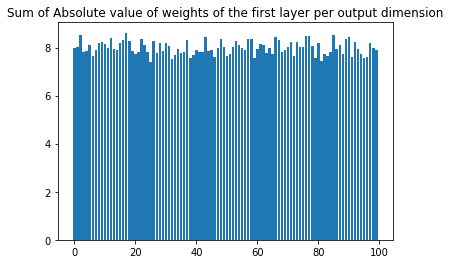

In [10]:
# Plot the value of the weights of the first layer
import matplotlib.pyplot as plt
import torch

weights = model.l_in.weight.detach()

plt.bar(range(100), torch.abs(weights).sum(dim=1))
plt.title("Sum of Absolute value of weights of the first layer per output dimension")
plt.show()